# 樣形識別HW02


In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras

Loading the MNIST dataset in Keras

In [ ]:
(train_image,train_label), (test_image,test_label)= keras.datasets.mnist.load_data()

In [ ]:
train_image.shape, train_label.shape, test_image.shape, test_label.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Data Visualization

In [ ]:
x= train_image[2500]

In [ ]:
#%%
for i in range(28):
    for j in range(28):
        z= x[i,j]
        print(f'{z:3d}', end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 61178207 22  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  6178254254 48 98235153  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 14254254179  8 71254253214 11  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0120254254 60  0 12 77231254197 56  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 43222254239 23  0  0  0 51237254228 56  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0173254254144  0  0  0  0  0 51240254229 45  0  0  0  0  0
  0  0  0  0  0  0  0  0 29215254254144  0  0  0  0  0  0 51237254146  0  0  0  0  0
  0  0  0  0  0  0  0 34217254254197  7  0  0  0  0  0  0  0 87254213  0  0  0  0  0
  0  0  0  0  0  0  0 77254254250 80  0  0  0  0  0  0  0  0 8425

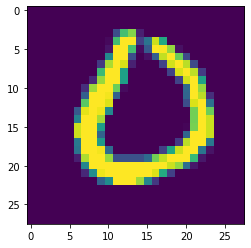

In [ ]:
import matplotlib.pyplot as pl
pl.imshow(x)

In [ ]:
y= train_label[2500]
print("y="f'{y}')

y=0


The compilation step

In [ ]:
Model= keras.Sequential([
    #keras.Input(28*28,1),
    #keras.layers.Flatten(),
    keras.layers.Dense(512,activation='relu'),    
    keras.layers.Dense(10,activation='softmax')   
    ])

Model.compile(
    optimizer= 'rmsprop', #優化器
    loss= 'sparse_categorical_crossentropy', #損失函數
    metrics= ['accuracy'] #評量準則
    )

Preparing the image data

In [ ]:
train_image = train_image.reshape((-1,28*28))
train_image = train_image.astype('float32')/ 255

test_image = test_image.reshape((-1,28*28))
test_image = test_image.astype('float32')/ 255

In [ ]:
#from tensorflow.keras.utils import to_categorical

#train_label = to_categorical(train_label)
#test_label = to_categorical(test_label)

In [ ]:
Model.fit(train_image, train_label, epochs=10, batch_size=128)
Model.evaluate(train_image, train_label)

Epoch 1/10
469/469 [==============================] - 6s 13ms/step - loss: 0.2560 - accuracy: 0.9260
Epoch 2/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1040 - accuracy: 0.9699
Epoch 3/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0679 - accuracy: 0.9800
Epoch 4/10
469/469 [==============================] - 5s 12ms/step - loss: 0.0494 - accuracy: 0.9854
Epoch 5/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0380 - accuracy: 0.9888
Epoch 6/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0287 - accuracy: 0.9915
Epoch 7/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0221 - accuracy: 0.9935
Epoch 8/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0172 - accuracy: 0.9950
Epoch 9/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0129 - accuracy: 0.9962
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0055 - accur

[0.005512012634426355, 0.9987166523933411]

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 512)               401920    
                                                                 
 dense_71 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


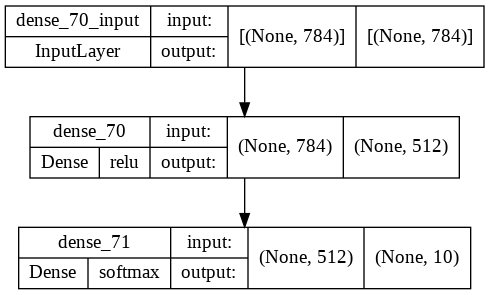

In [ ]:
Model.summary()

keras.utils.plot_model(Model, 
    show_shapes= True, 
    show_layer_activations= True)

In [ ]:
test_loss , test_acc = Model.evaluate(test_image,test_label)
print('test_acc:',test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0674 - accuracy: 0.9825
test_acc: 0.9825000166893005
